In [ ]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [22]:
# Reading the data

df = pd.read_csv('customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [23]:
df.isna().sum() # Investigating missing values

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [24]:
# Determining which rows to drop
df[(~df['Resolution'].isna()) & 
   (~df['Customer Satisfaction Rating'].isna())][['Resolution','Customer Satisfaction Rating']]


,Resolution,Customer Satisfaction Rating
2,Case maybe show recently my computer follow.,3.0
3,Try capital clearly never color toward story.,3.0
4,West decision evidence bit.,1.0
10,Measure tonight surface feel forward.,1.0
11,Measure there house management pick knowledge ...,1.0
...,...,...
8452,Interesting show must successful.,3.0
8453,Skill expect admit and.,5.0
8455,Say position key appear behavior.,1.0
8466,Eight account century nature kitchen.,3.0


From this we can see that the non null rows for the Resolution column are the same as the non null rows for the Customer Satisfaction rating. We opt to drop the nulls.

In [25]:
df.dropna(inplace = True)
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticket ID,2769.0,NaN,NaN,NaN,4237.163597,2446.830952,3.0,2145.0,4240.0,6329.0,8468.0
Customer Name,2769,2714,Christopher Jones,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Email,2769,2749,asmith@example.com,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Age,2769.0,NaN,NaN,NaN,44.333694,15.195495,18.0,31.0,45.0,57.0,70.0
Customer Gender,2769,3,Female,984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Purchased,2769,42,Canon EOS,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Purchase,2769,717,2021-11-05,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket Type,2769,5,Refund request,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket Subject,2769,16,Network problem,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket Description,2769,2680,I'm having an issue with the {product_purchase...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df['Customer Satisfaction Rating'].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

Is there a relationship between the age and the rating?

Text(0.5, 1.0, 'Age vs. Customer Satisfaction')

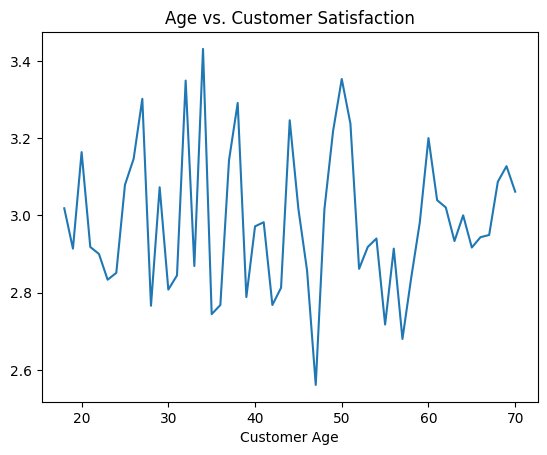

In [27]:
# Satisfaction rating grouped by Age
df.groupby('Customer Age')['Customer Satisfaction Rating'].mean().plot()
plt.title('Age vs. Customer Satisfaction')

Is there a relationship between the gender and the rating?

Text(0.5, 1.0, 'Distribution of Customer Satisfaction Rating by Gender')

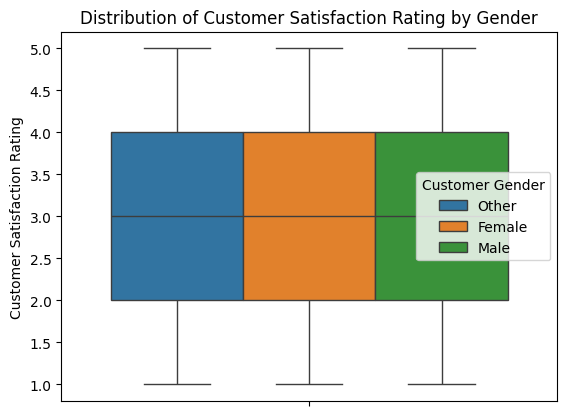

In [28]:
import seaborn as sns
sns.boxplot(data = df, y='Customer Satisfaction Rating', hue = 'Customer Gender')
plt.title('Distribution of Customer Satisfaction Rating by Gender')

In [29]:
df.groupby('Customer Gender')['Customer Satisfaction Rating'].mean()

Customer Gender
Female    2.971545
Male      3.028384
Other     2.974684
Name: Customer Satisfaction Rating, dtype: float64

In [30]:
#Investigating Time variables
df[['First Response Time', 'Time to Resolution']]

,First Response Time,Time to Resolution
2,2023-06-01 11:14:38,2023-06-01 18:05:38
3,2023-06-01 07:29:40,2023-06-01 01:57:40
4,2023-06-01 00:12:42,2023-06-01 19:53:42
10,2023-06-01 17:46:49,2023-05-31 23:51:49
11,2023-06-01 12:05:51,2023-06-01 09:27:51
...,...,...
8452,2023-06-01 14:14:05,2023-06-01 05:47:05
8453,2023-06-01 12:56:06,2023-06-01 04:45:06
8455,2023-06-01 14:15:07,2023-06-01 06:58:07
8466,2023-06-01 09:44:22,2023-06-01 04:31:22


Is there a relationship between the time it takes for a resolution to the rating?

In [31]:
# Extracting time taken between first contact and resolution
df['Resolution Time'] = pd.to_datetime(df['Time to Resolution']).dt.hour - pd.to_datetime(df['First Response Time']).dt.hour 
df[df['Resolution Time']>0][['First Response Time', 'Time to Resolution', 'Resolution Time']]

,First Response Time,Time to Resolution,Resolution Time
2,2023-06-01 11:14:38,2023-06-01 18:05:38,7
4,2023-06-01 00:12:42,2023-06-01 19:53:42,19
10,2023-06-01 17:46:49,2023-05-31 23:51:49,6
14,2023-06-01 06:22:55,2023-05-31 23:08:55,17
19,2023-06-01 00:46:04,2023-06-01 20:29:04,20
...,...,...,...
8423,2023-06-01 12:57:26,2023-06-01 23:05:26,11
8426,2023-06-01 06:18:31,2023-06-01 13:28:31,7
8430,2023-06-01 13:03:36,2023-06-01 17:16:36,4
8432,2023-06-01 07:25:38,2023-06-01 15:47:38,8


Text(0.5, 1.0, 'Customer Satisfaction vs. Resolution Time')

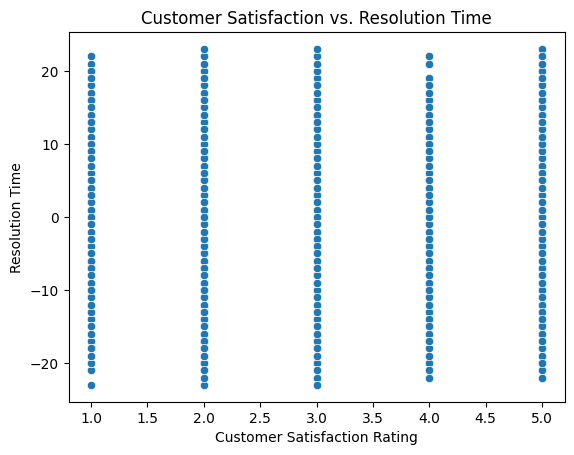

In [32]:
# Resolution time vs Satisfaction Rating 
sns.scatterplot(data = df, x = 'Customer Satisfaction Rating', y = 'Resolution Time')
plt.title('Customer Satisfaction vs. Resolution Time')

Resolution time does not appear to be a good indicator of Customer Satisfaction Ratings

In [33]:
# Unique Product items
df['Product Purchased'].value_counts()

Product Purchased
Canon EOS                         83
iPhone                            82
Canon DSLR Camera                 81
GoPro Hero                        80
Microsoft Office                  80
Sony Xperia                       78
Sony 4K HDR TV                    74
Apple AirPods                     74
Nest Thermostat                   73
LG OLED                           73
Amazon Echo                       72
Garmin Forerunner                 70
Roomba Robot Vacuum               70
Google Pixel                      69
Nikon D                           69
LG Smart TV                       68
Bose QuietComfort                 68
Philips Hue Lights                68
LG Washing Machine                68
Amazon Kindle                     66
PlayStation                       65
Sony PlayStation                  65
Autodesk AutoCAD                  64
Bose SoundLink Speaker            64
Google Nest                       63
Fitbit Charge                     63
Adobe Photoshop     

In [34]:
# Ticket Subject Counts
df['Ticket Subject'].value_counts()

Ticket Subject
Network problem             201
Software bug                199
Product compatibility       195
Product recommendation      186
Product setup               183
Hardware issue              183
Delivery problem            178
Refund request              178
Battery life                173
Account access              171
Peripheral compatibility    158
Installation support        158
Payment issue               156
Display issue               155
Cancellation request        148
Data loss                   147
Name: count, dtype: int64

In [35]:
# Which Subject has the lowest Satisfaction Rating
df.groupby('Ticket Subject')['Customer Satisfaction Rating'].mean().sort_values()

Ticket Subject
Delivery problem            2.803371
Network problem             2.880597
Account access              2.941520
Battery life                2.953757
Product compatibility       2.958974
Peripheral compatibility    2.962025
Data loss                   2.965986
Product recommendation      2.967742
Product setup               2.983607
Hardware issue              3.000000
Software bug                3.045226
Payment issue               3.057692
Refund request              3.067416
Cancellation request        3.067568
Display issue               3.077419
Installation support        3.183544
Name: Customer Satisfaction Rating, dtype: float64

In [36]:
# Categorizing Scores

def Satisfaction_Rank(score):
    '''
    Assigning categories to the Satisfaction scores by customers
    '''
    if score < 3:
        _rank = 'poor'
    elif score == 3:
        _rank = 'average'
    else:
        _rank = 'satisfactory'
    return _rank


df['Satisfaction Rank'] = df['Customer Satisfaction Rating'].apply(Satisfaction_Rank)
    
df[['Customer Satisfaction Rating',	'Satisfaction Rank']][:5]

,Customer Satisfaction Rating,Satisfaction Rank
2,3.0,average
3,3.0,average
4,1.0,poor
10,1.0,poor
11,1.0,poor


Satisfaction Rank         average  poor  satisfactory
Account access                 32    74            65
Battery life                   30    74            69
Cancellation request           33    55            60
Data loss                      28    59            60
Delivery problem               34    86            58
Display issue                  34    56            65
Hardware issue                 41    71            71
Installation support           38    53            67
Network problem                37    88            76
Payment issue                  31    60            65
Peripheral compatibility       45    57            56
Product compatibility          45    77            73
Product recommendation         43    73            70
Product setup                  37    74            72
Refund request                 36    66            76
Software bug                   36    79            84


<Axes: xlabel='Satisfaction Rank'>

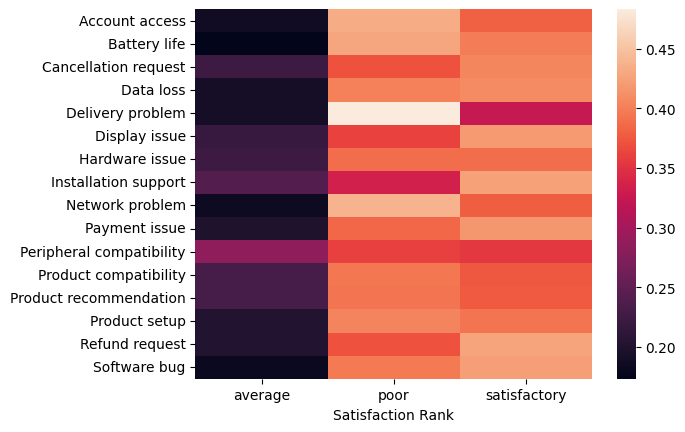

In [37]:
# Visualizing datissfaction ranks across Subjects
Subject_table = pd.pivot_table(df, index = df['Ticket Subject'].values, columns = 'Satisfaction Rank', aggfunc = 'count')['Ticket Subject']
print(Subject_table)
row_sums = Subject_table.values.sum(axis=1, keepdims=True)  # Shape (n,1) for broadcasting
normalized = Subject_table.values / row_sums

# Heatmap of ranks with respect to Ticket Subjects
sns.heatmap(pd.DataFrame(normalized, columns = Subject_table.columns, index = Subject_table.index))

Text(0.5, 1.0, 'Satisfaction Averages over time')

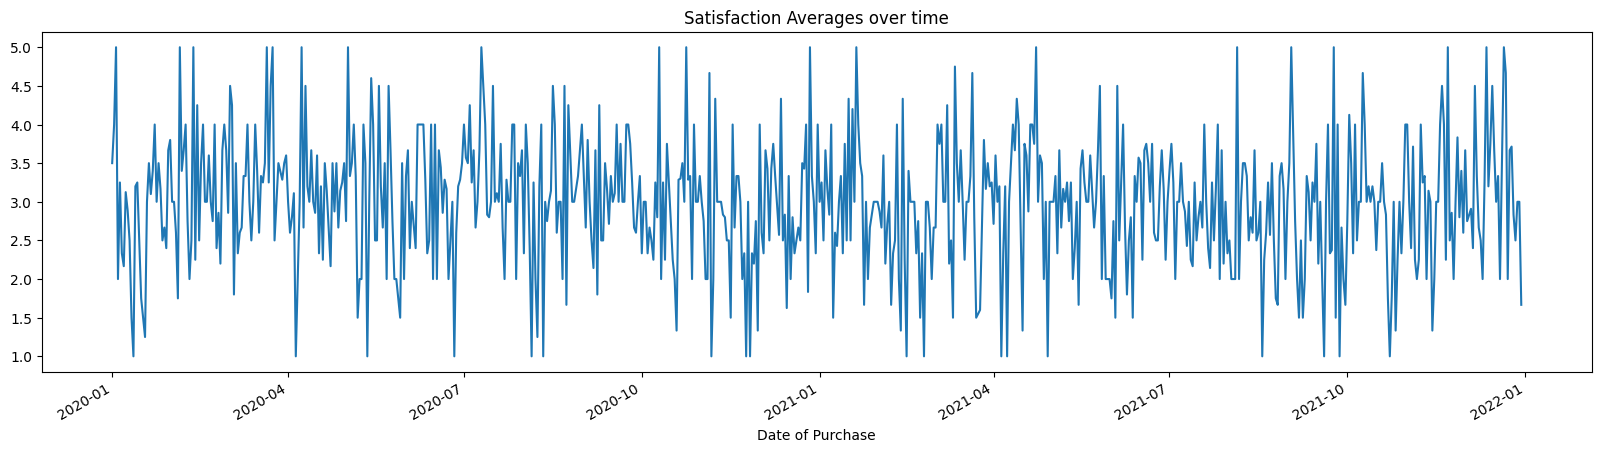

In [38]:
# Investigating Time span of the data
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df.groupby('Date of Purchase')['Customer Satisfaction Rating'].mean().plot(figsize = (20,5))
plt.title('Satisfaction Averages over time')

Text(0.5, 1.0, 'Satisfaction across Ticket Types')

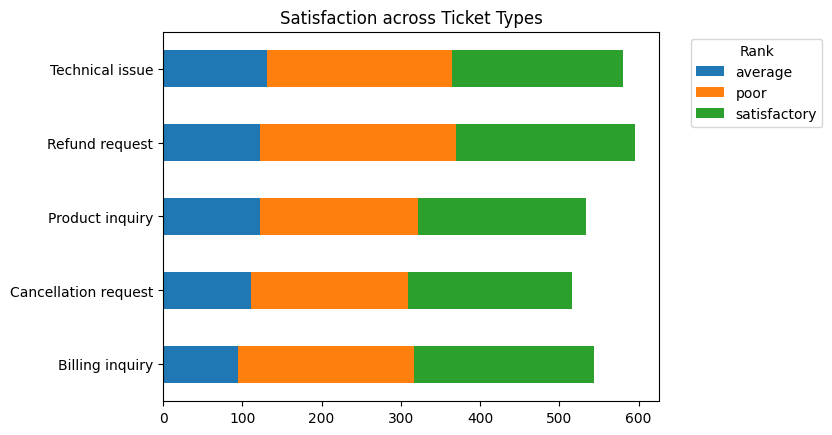

In [39]:
# Visual of satisfaction ranks across ticket types 
Type_table = pd.pivot_table(df, index = df['Ticket Type'].values, columns = 'Satisfaction Rank', aggfunc = 'count')['Ticket Type']
Type_table.plot(kind = 'barh', stacked = True)
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Satisfaction across Ticket Types')

Text(0.5, 1.0, 'Satisfaction across Priorities')

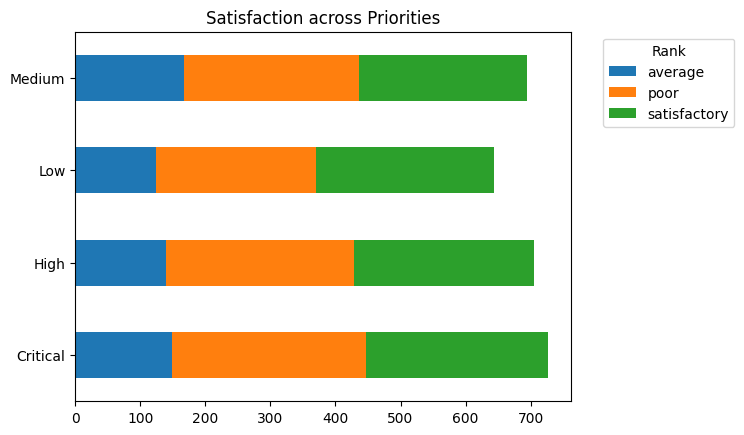

In [40]:
# Visual of ranks across ticket priority categories
Priority_table = pd.pivot_table(df, index = df['Ticket Priority'].values, columns = 'Satisfaction Rank', aggfunc = 'count')['Ticket Priority']
Priority_table.plot(kind = 'barh', stacked = True)
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Satisfaction across Priorities')

In [41]:
# Analysing Customer Most common Complaints

sample_text = df['Ticket Description'][2]
print('sample_text')
print()
print(sample_text)

# Some responses have back and forth between the technical team and the customer so we have to split the text after new paragraphs.

issues = df['Ticket Description'].str.split('\n', expand = True)

print()
print('issues')

issues.head()

sample_text

I'm facing a problem with my {product_purchased}. The {product_purchased} is not turning on. It was working fine until yesterday, but now it doesn't respond.

1.8.3 I really I'm using the original charger that came with my {product_purchased}, but it's not charging properly.

issues


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
2,I'm facing a problem with my {product_purchase...,\r,1.8.3 I really I'm using the original charger ...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,I'm having an issue with the {product_purchase...,\r,If you have a problem you're interested in and...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,I'm having an issue with the {product_purchase...,\r,\r,Note: The seller is not responsible for any da...,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10,I'm having an issue with the {product_purchase...,\r,Product Search: What's New in 2-3-4-5? Report ...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
11,I'm having an issue with the {product_purchase...,\r,4. It is possible that we cannot find some typ...,\r,5. On the I've reviewed the troubleshooting st...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [42]:
issues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2769 non-null   object
 1   1       2023 non-null   object
 2   2       2017 non-null   object
 3   3       926 non-null    object
 4   4       858 non-null    object
 5   5       351 non-null    object
 6   6       315 non-null    object
 7   7       151 non-null    object
 8   8       128 non-null    object
 9   9       69 non-null     object
 10  10      56 non-null     object
 11  11      26 non-null     object
 12  12      22 non-null     object
 13  13      10 non-null     object
 14  14      9 non-null      object
 15  15      6 non-null      object
 16  16      5 non-null      object
 17  17      1 non-null      object
 18  18      1 non-null      object
 19  19      1 non-null      object
 20  20      1 non-null      object
 21  21      1 non-null      object
 22  22      1 non-null      objec

In [43]:
# Dropping the columns with few non-nulls

issues = issues.loc[: , :2]
issues.head()

,0,1,2
2,I'm facing a problem with my {product_purchase...,\r,1.8.3 I really I'm using the original charger ...
3,I'm having an issue with the {product_purchase...,\r,If you have a problem you're interested in and...
4,I'm having an issue with the {product_purchase...,\r,\r
10,I'm having an issue with the {product_purchase...,\r,Product Search: What's New in 2-3-4-5? Report ...
11,I'm having an issue with the {product_purchase...,\r,4. It is possible that we cannot find some typ...


In [69]:
# Determining the most common issues reported by our customers
import re
from collections import Counter

def issue_count(series):
    '''
    Cleans the text data and obtains a count for the most common strings.

    '''
        
    def clean_data(text):
        if not isinstance(text, str):
            return 'None'
        text = text.lower()
        # Regular expression to remove special characters and punctuation except for apostrophe, numbers, and whitespace.
        text = re.sub(r"[^\w\s]", "'", text) 
        return text
    
    series = series.apply(clean_data)

    # List  most common conjuctions and articles
    exclude_words = ['of', 'in', 'but', 'is', 'and', 'a', 'on', 'or', 'for', 'to', 'with', 'as', 'the']

    counts = Counter(series)

    refined_counts = [(word, count) for word, count in counts.most_common() if word not in exclude_words]

    return refined_counts



In [83]:
issue_count(first_corr[1])

[(' please assist', 1958),
 (" it keeps displaying an 'invalid credentials' error' even though i'm using the correct login information",
  71),
 (" the 'product_purchased' is not turning on", 61),
 (" it doesn't detect any networks' although other devices are connecting fine",
  57),
 (' it keeps disconnecting intermittently', 55),
 (' i suspect there might be a hardware issue', 54),
 (' all the files and documents seem to have disappeared', 54),
 (" is there any way to recover the deleted files' i need them urgently", 53),
 (" it freezes frequently' making it difficult to use", 52),
 (" it's causing data loss and unexpected errors", 51),
 (" whenever i try to perform a specific action' the application crashes", 51),
 (" the screen is flickering' and i'm unable to use it", 49),
 (" what steps should i take to troubleshoot this issue'\r", 45),
 (' it says my account is locked', 42),
 (" how can i recover my account'\r", 39),
 (" is there any way to recover the lost data'\r", 18),
 (" is

In [46]:
first_corr = issues[0].str.split('.', expand = True)
